In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


pd.set_option('display.max_rows', 50000)
pd.set_option('display.max_columns', 50000)
pd.set_option('display.width', 100000)

In [2]:
from df_name import name

jtd = pd.read_csv("JTD.csv")
jtd = name(jtd)
jtd.head()

,unnamed:_0,dbm_order,order_item,material,labor_value_number,description,item_category,order_quantity,target_quantity_uom,net_value
0,0,22385,180,OSLCC_SRV31,NaN,MACHINING RR.SUSPENSION CHARGE (MAJOR),P010,1.2,MIN,1869.87
1,1,23910,10,1DM279018170117,NaN,ASSY.OIL COOLER (6-PLATE) (VOR,P002,1.0,EA,2151.13
2,2,23910,40,1IS150203BE01,NaN,FRONT WHEEL BEARING/ LUBRICATE,P002,1.0,EA,2552.92
3,3,23910,60,1DM279001990173,NaN,ASSY.CYL.HEAD W /O INJ.(NA W /O,P002,1.0,EA,20360.14
4,4,23910,70,1DM88552790S001SA,NaN,Engine Overhaul Kit -Indica Di,P002,1.0,EA,10691.63


In [3]:
jtd.isnull().sum()/len(jtd)*100

unnamed:_0              0.000000
dbm_order               0.000000
order_item              0.000000
material                0.918750
labor_value_number     67.159778
description             0.918750
item_category           0.000000
order_quantity          0.000000
target_quantity_uom     0.918750
net_value               0.000000
dtype: float64

In [4]:
jtd.dropna(inplace=True)
jtd.head()

,unnamed:_0,dbm_order,order_item,material,labor_value_number,description,item_category,order_quantity,target_quantity_uom,net_value
260,260,51135,260,HYUNDAI_SRV,HYACEN0038,OVERHAUL CYLINDER HEAD (DIESEL),P001,672.0,MIN,2821.99
269,269,51519,60,MAHINDRA_SRV,MMVEPS0003,MISC LABOR 1 HOUR,P001,60.0,MIN,474.00
272,272,52601,30,FORD_SRV,FDIKEL0082,REPLACE CENTRAL LOCK CONTROL UNIT,P001,72.0,MIN,389.00
273,273,52601,40,FORD_SRV,FDIKBK0024,REPLACE BRAKE SHOE,P001,75.6,MIN,408.00
274,274,52601,50,FDIK_MENU1,FDIKPS0007,Paid Service-Minor,P001,1.0,MIN,650.00


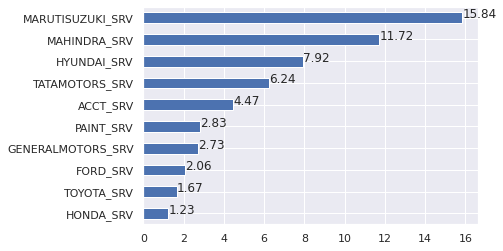

In [5]:
(jtd.material.value_counts(normalize=True)*100)[:10][::-1].plot.barh()
for num, counts in enumerate((jtd.material.value_counts(normalize=True)*100)[:10][::-1]):
    plt.text(counts, num, np.round(counts,2))
plt.show()

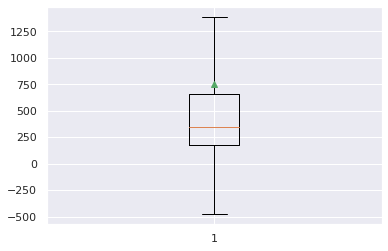

Minimum = -479.99
Max = 434000.0
Mean = 754.812522017653
Median = 344.38


In [6]:
plt.boxplot(jtd.net_value, showfliers=False, showmeans=True)
plt.show()
print(f"Minimum = {jtd.net_value.min()}")
print(f"Max = {jtd.net_value.max()}")
print(f"Mean = {jtd.net_value.mean()}")
print(f"Median = {jtd.net_value.median()}")

In [7]:
zero_net_df = jtd[jtd.net_value==0]
zero_net_df.head()

,unnamed:_0,dbm_order,order_item,material,labor_value_number,description,item_category,order_quantity,target_quantity_uom,net_value
696,696,63540,10,HYI2_VAS8,HYI2IP0030,Interior & Upholstery Cleaning,P001,1.0,MIN,0.0
697,697,63540,20,HYI2_MENU14,HYI2PS0009,General Check up,P001,1.0,MIN,0.0
698,698,63540,30,HYI2_MENU2,HYI2PS0008,Paid Service-Major,P001,1.0,MIN,0.0
717,717,64578,40,MSRI_MENU1,MSRIPS0007,Paid Service-Minor,P001,1.0,MIN,0.0
718,718,64578,50,MSRI_MENU14,MSRIPS0009,General Check up,P001,1.0,MIN,0.0


In [8]:
f"Size of data for zero net value = {np.round(len(zero_net_df)/len(jtd)*100,2)}%"

'Size of data for zero net value = 5.49%'

In [9]:
neg_net_value = jtd[jtd.net_value<0]
neg_net_value.head()

,unnamed:_0,dbm_order,order_item,material,labor_value_number,description,item_category,order_quantity,target_quantity_uom,net_value
83305,83305,88597,30,MARUTISUZUKI_SRV,MSETPS0004,WASHING,P001,84.0,MIN,-0.01
495640,495640,149804,230,MSSW_MENU3,MSSWWH0013,Wheel Alignment,P001,1.0,MIN,-0.01
1005662,1005662,747603,20,MSAL_MENU4,MSALWH0014,Wheel Balancing (5 Wheels),P001,1.0,MIN,-0.01
1415356,1415356,314799,20,MS80_MENU4,MS80WH0014,Wheel Balancing (5 Wheels),P001,1.0,MIN,-0.01
1528050,1528050,335215,30,FDFI_MENU4,FDFIWH0014,Wheel Balancing (5 Wheels),P001,1.0,MIN,-0.01


In [10]:
f"Size of data for negative net value = {np.round(len(neg_net_value)/len(jtd)*100,2)}%"

'Size of data for negative net value = 0.01%'

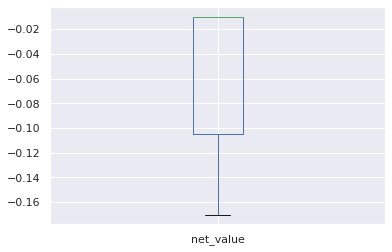

Minimum = -479.99
Max = -0.01
Mean = -20.46991379310344
Median = -0.01


In [11]:
neg_net_value.net_value.plot(kind="box", showfliers=False)
plt.show()
print(f"Minimum = {neg_net_value.net_value.min()}")
print(f"Max = {neg_net_value.net_value.max()}")
print(f"Mean = {neg_net_value.net_value.mean()}")
print(f"Median = {neg_net_value.net_value.median()}")

In [12]:
[i for i in jtd.description]

['OVERHAUL CYLINDER HEAD (DIESEL)',
 'MISC LABOR 1 HOUR',
 'REPLACE CENTRAL LOCK CONTROL UNIT',
 'REPLACE BRAKE SHOE',
 'Paid Service-Minor',
 'REPLACE THROTTLE POSITION SENSOR',
 'REPLACE VEHICLE SPEED SENSOR',
 'REPLACE ACCESSORIES BELT  (ALTERNATOR)',
 'REPLACE STRUT KIT FRONT ONE SIDE',
 'REPLACE STRUT KIT FRONT ONE SIDE',
 'REPLACE STRUT KIT REAR ONE SIDE',
 'REPLACE STRUT KIT REAR ONE SIDE',
 'REPLACE REAR SHOCK ABSORBER RHS',
 'REPLACE REAR SHOCK ABSORBER LHS',
 'REMOVE & REFIT KEY LOCK SET',
 'REMOVE & REFIT DOOR WINDER HANDLE INNER',
 'REPLACE PARKING BRAKE SWITCH',
 'REPAIR ENGINE WIRING',
 'Interior & Upholstery Cleaning',
 'LABOUR VALUE FOR MARUTI SUZUKI',
 'Paid Service-Minor',
 'Paid Service-Minor',
 'REMOVE & REFIT FUEL TANK',
 'REPLACE THROTTLE BODY / GASKET',
 'Brake service - All 4 Wheels',
 'REMOVE & REFIT CYLINDER HEAD',
 'REPLACE STEERING RACK',
 'REMOVE & REFIT IGNITION COIL / IGNITOR',
 'REPLACE CONTACT POINT ASSY',
 'CHARGING BATTERY & TESTING LOAD',
 'REPLACE H

In [13]:
from nltk import TreebankWordTokenizer 

In [14]:
tb = TreebankWordTokenizer()
jtd.description = jtd.description.map(lambda x: tb.tokenize(x))

In [15]:
jtd.description = jtd.description.map(lambda x:[i.lower() for i in x])
jtd.head()

,unnamed:_0,dbm_order,order_item,material,labor_value_number,description,item_category,order_quantity,target_quantity_uom,net_value
260,260,51135,260,HYUNDAI_SRV,HYACEN0038,"[overhaul, cylinder, head, (, diesel, )]",P001,672.0,MIN,2821.99
269,269,51519,60,MAHINDRA_SRV,MMVEPS0003,"[misc, labor, 1, hour]",P001,60.0,MIN,474.00
272,272,52601,30,FORD_SRV,FDIKEL0082,"[replace, central, lock, control, unit]",P001,72.0,MIN,389.00
273,273,52601,40,FORD_SRV,FDIKBK0024,"[replace, brake, shoe]",P001,75.6,MIN,408.00
274,274,52601,50,FDIK_MENU1,FDIKPS0007,"[paid, service-minor]",P001,1.0,MIN,650.00


In [16]:
def little_description(description):
    for i in description:
        if i == "replace":
            return i
        elif i in ["remove & refit","remove and refit"]:
            return "remove & refit"
        elif i == "repair":
            return i
        elif i == "paid":
            return i
        elif i == "washing":
            return i
        elif i == "general":
            return i
        elif i in ["wheel alignment", "wheel balancing", "wheel balance"]:
            return "wheel alignment/balance"
        elif i == "overhaul":
            return i
        elif i == "misc":
            return " ".join(description)
        else:
            return "unknown"
    
jtd["little_des"] = jtd.description.map(little_description)

In [17]:
jtd.head()

,unnamed:_0,dbm_order,order_item,material,labor_value_number,description,item_category,order_quantity,target_quantity_uom,net_value,little_des
260,260,51135,260,HYUNDAI_SRV,HYACEN0038,"[overhaul, cylinder, head, (, diesel, )]",P001,672.0,MIN,2821.99,overhaul
269,269,51519,60,MAHINDRA_SRV,MMVEPS0003,"[misc, labor, 1, hour]",P001,60.0,MIN,474.00,misc labor 1 hour
272,272,52601,30,FORD_SRV,FDIKEL0082,"[replace, central, lock, control, unit]",P001,72.0,MIN,389.00,replace
273,273,52601,40,FORD_SRV,FDIKBK0024,"[replace, brake, shoe]",P001,75.6,MIN,408.00,replace
274,274,52601,50,FDIK_MENU1,FDIKPS0007,"[paid, service-minor]",P001,1.0,MIN,650.00,paid


In [18]:
jtd.little_des.value_counts(normalize=True)*100

unknown                  42.183997
replace                  16.600224
paid                     14.209318
washing                  10.755257
general                   3.629303
misc labor 0.5 hours      3.412824
misc labor 0.25 hours     2.717114
misc labor 1 hour         1.841989
misc labor 2 hours        1.721043
overhaul                  1.713348
repair                    0.888509
misc labour 1.5 hours     0.327075
Name: little_des, dtype: float64

In [19]:
jtd.description = jtd.description.map(lambda x: " ".join(x))

In [31]:
description_2 = (jtd.description.value_counts(normalize=True)*100)[:20]
description_2

paid service-minor                   10.938085
washing                              10.755257
wheel alignment                      10.361099
wheel balancing ( 5 wheels )          4.333304
misc labor 0.5 hours                  3.412824
general check up                      3.391854
paid service-major                    3.271233
misc labor 0.25 hours                 2.717114
interior & upholstery cleaning        2.430571
replace brake pad ( both side )       2.089029
misc labor 1 hour                     1.841989
misc labor 2 hours                    1.721043
brake service - all 4 wheels          1.150721
clutch overhaul                       1.067273
painting charges                      1.026687
replace engine oil & oil filter       0.989894
cleaning injector petrol ( each )     0.836435
replace coolant                       0.787016
tyre rotation                         0.678913
remove & refit charges                0.656967
Name: description, dtype: float64

In [32]:
#description_2 contains top 25 most frequent descriptions
jtd["description_2"] = ["other" if i not in description_2.index else i for i in jtd.description]
jtd.head()

,unnamed:_0,dbm_order,order_item,material,labor_value_number,description,item_category,order_quantity,target_quantity_uom,net_value,little_des,description_2
260,260,51135,260,HYUNDAI_SRV,HYACEN0038,overhaul cylinder head ( diesel ),P001,672.0,MIN,2821.99,overhaul,other
269,269,51519,60,MAHINDRA_SRV,MMVEPS0003,misc labor 1 hour,P001,60.0,MIN,474.00,misc labor 1 hour,misc labor 1 hour
272,272,52601,30,FORD_SRV,FDIKEL0082,replace central lock control unit,P001,72.0,MIN,389.00,replace,other
273,273,52601,40,FORD_SRV,FDIKBK0024,replace brake shoe,P001,75.6,MIN,408.00,replace,other
274,274,52601,50,FDIK_MENU1,FDIKPS0007,paid service-minor,P001,1.0,MIN,650.00,paid,paid service-minor


In [34]:
jtd.description_2.value_counts(normalize=True)*100

other                                35.542694
paid service-minor                   10.938085
washing                              10.755257
wheel alignment                      10.361099
wheel balancing ( 5 wheels )          4.333304
misc labor 0.5 hours                  3.412824
general check up                      3.391854
paid service-major                    3.271233
misc labor 0.25 hours                 2.717114
interior & upholstery cleaning        2.430571
replace brake pad ( both side )       2.089029
misc labor 1 hour                     1.841989
misc labor 2 hours                    1.721043
brake service - all 4 wheels          1.150721
clutch overhaul                       1.067273
painting charges                      1.026687
replace engine oil & oil filter       0.989894
cleaning injector petrol ( each )     0.836435
replace coolant                       0.787016
tyre rotation                         0.678913
remove & refit charges                0.656967
Name: descrip

In [36]:
jtd.groupby(["description_2"])[["net_value"]].mean().reset_index()

,description_2,net_value
0,brake service - all 4 wheels,466.795377
1,cleaning injector petrol ( each ),158.964171
2,clutch overhaul,1957.150068
3,general check up,262.628468
4,interior & upholstery cleaning,441.354585
5,misc labor 0.25 hours,240.382682
6,misc labor 0.5 hours,329.324192
7,misc labor 1 hour,522.864068
8,misc labor 2 hours,2298.033250
9,other,1103.543197


In [37]:
jtd["description_2_bin"] = jtd.description_2.map(lambda x: 0 if x == "other" else 1)

In [40]:
sum_25 = jtd.groupby(["description_2_bin"])[["net_value"]].sum().reset_index()
sum_25

,description_2_bin,net_value
0,0,7.238394e+08
1,1,6.691302e+08


In [41]:
sum_25.net_value = sum_25.net_value/np.sum(sum_25.net_value)*100

In [42]:
sum_25

,description_2_bin,net_value
0,0,51.963762
1,1,48.036238


In [43]:
jtd.description.nunique()

904

In [44]:
jtd.groupby(["description_2_bin"])[["net_value"]].mean().reset_index()


,description_2_bin,net_value
0,0,1103.543197
1,1,562.517368


In [45]:
jtd.head()

,unnamed:_0,dbm_order,order_item,material,labor_value_number,description,item_category,order_quantity,target_quantity_uom,net_value,little_des,description_2,description_2_bin
260,260,51135,260,HYUNDAI_SRV,HYACEN0038,overhaul cylinder head ( diesel ),P001,672.0,MIN,2821.99,overhaul,other,0
269,269,51519,60,MAHINDRA_SRV,MMVEPS0003,misc labor 1 hour,P001,60.0,MIN,474.00,misc labor 1 hour,misc labor 1 hour,1
272,272,52601,30,FORD_SRV,FDIKEL0082,replace central lock control unit,P001,72.0,MIN,389.00,replace,other,0
273,273,52601,40,FORD_SRV,FDIKBK0024,replace brake shoe,P001,75.6,MIN,408.00,replace,other,0
274,274,52601,50,FDIK_MENU1,FDIKPS0007,paid service-minor,P001,1.0,MIN,650.00,paid,paid service-minor,1


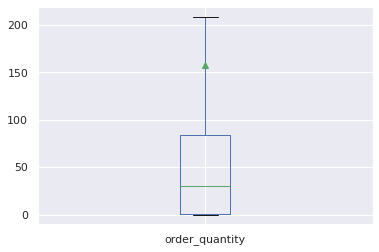

In [48]:
jtd.order_quantity.plot(kind="box",showmeans=True, showfliers=False)
plt.show()

In [54]:
jtd.head()

,unnamed:_0,dbm_order,order_item,material,labor_value_number,description,item_category,order_quantity,target_quantity_uom,net_value,little_des,description_2,description_2_bin
260,260,51135,260,HYUNDAI_SRV,HYACEN0038,overhaul cylinder head ( diesel ),P001,672.0,MIN,2821.99,overhaul,other,0
269,269,51519,60,MAHINDRA_SRV,MMVEPS0003,misc labor 1 hour,P001,60.0,MIN,474.00,misc labor 1 hour,misc labor 1 hour,1
272,272,52601,30,FORD_SRV,FDIKEL0082,replace central lock control unit,P001,72.0,MIN,389.00,replace,other,0
273,273,52601,40,FORD_SRV,FDIKBK0024,replace brake shoe,P001,75.6,MIN,408.00,replace,other,0
274,274,52601,50,FDIK_MENU1,FDIKPS0007,paid service-minor,P001,1.0,MIN,650.00,paid,paid service-minor,1


In [55]:
#description_3 contains top 3 most frequent descriptions
jtd["description_3"] = ["other" if i not in description_2[:3].index else i for i in jtd.description]
jtd.head()

,unnamed:_0,dbm_order,order_item,material,labor_value_number,description,item_category,order_quantity,target_quantity_uom,net_value,little_des,description_2,description_2_bin,description_3
260,260,51135,260,HYUNDAI_SRV,HYACEN0038,overhaul cylinder head ( diesel ),P001,672.0,MIN,2821.99,overhaul,other,0,other
269,269,51519,60,MAHINDRA_SRV,MMVEPS0003,misc labor 1 hour,P001,60.0,MIN,474.00,misc labor 1 hour,misc labor 1 hour,1,other
272,272,52601,30,FORD_SRV,FDIKEL0082,replace central lock control unit,P001,72.0,MIN,389.00,replace,other,0,other
273,273,52601,40,FORD_SRV,FDIKBK0024,replace brake shoe,P001,75.6,MIN,408.00,replace,other,0,other
274,274,52601,50,FDIK_MENU1,FDIKPS0007,paid service-minor,P001,1.0,MIN,650.00,paid,paid service-minor,1,paid service-minor


In [56]:
jtd["description_3_bin"] = [0 if i=="other" else 1 for i in jtd.description_3]

In [57]:
sum_3 = jtd.groupby(["description_3_bin"])[["net_value"]].sum().reset_index()
sum_3.net_value = sum_3.net_value/np.sum(sum_3.net_value)*100
sum_3

,description_3_bin,net_value
0,0,86.152815
1,1,13.847185


In [60]:
jtd["description_3"].value_counts(normalize=True)*100

other                 67.945559
paid service-minor    10.938085
washing               10.755257
wheel alignment       10.361099
Name: description_3, dtype: float64

In [61]:
jtd.groupby(["description_3_bin"])[["net_value"]].sum().reset_index()

,description_3_bin,net_value
0,0,1.200082e+09
1,1,1.928871e+08


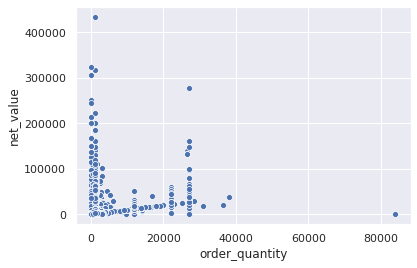

In [69]:
sns.scatterplot(jtd.order_quantity, jtd.net_value)
plt.show()